# Exploratory Data Analysis (EDA) - Oxford 102 Flowers Dataset

## Overview
This notebook performs comprehensive exploratory data analysis on the Oxford 102 Flowers dataset for the AQREIGHT Computer Vision Engineer Technical Assessment.

### Objectives:
1. Load and understand the dataset structure
2. Analyze class distribution and identifier potential imbalances
3. Examine image properties (dimensions, quality, etc.)
4. Identify data quality issues
5. Data Loading using custome stratified splits
6. Class Distribution Analysis for new splits

### Dataset Information:
- **Dataset**: Oxford 102 Flowers
- **Classes**: 102 flower categories
- **Images**: ~8,189 total images
- **Source**: Built into PyTorch torchvision

Mount first if use Colab

In [1]:
!git clone https://github.com/araara243/Fine-Grained-Image-Classification-Assesment.git
!cd Fine-Grained-Image-Classification-Assesment/

Cloning into 'Fine-Grained-Image-Classification-Assesment'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 70 (delta 13), reused 25 (delta 10), pack-reused 36 (from 1)
Receiving objects: 100% (70/70), 67.04 MiB | 19.81 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
import sys
import os

project_root = os.path.join(os.getcwd(), 'Fine-Grained-Image-Classification-Assesment')
src_dir = os.path.join(project_root, 'src')

if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

from data.loader import Flowers102Dataset, get_transforms

In [3]:
import torch
import torchvision
from torchvision.datasets import Flowers102
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from PIL import Image, ImageStat
from collections import Counter

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")

Libraries imported successfully!
PyTorch version: 2.9.0+cpu


## 1. Data Loading

In [4]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the original dataset
print("Loading Oxford 102 Flowers dataset...")

try:
    # Load training data
    train_dataset = Flowers102(
        root='../src/data',
        split='train',
        transform=data_transform,
        download=True
    )

    # Load test data
    test_dataset = Flowers102(
        root='../src/data',
        split='test',
        transform=data_transform,
        download=True
    )

    # Load validation data
    val_dataset = Flowers102(
        root='../src/data',
        split='val',
        transform=data_transform,
        download=True
    )

    print(f"Dataset loaded successfully!")
    print(f"Training samples: {len(train_dataset)}")
    print(f"Validation samples: {len(val_dataset)}")
    print(f"Test samples: {len(test_dataset)}")
    print(f"Total samples: {len(train_dataset) + len(val_dataset) + len(test_dataset)}")

except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Attempting to continue with partial data...")

Loading Oxford 102 Flowers dataset...


100%|██████████| 345M/345M [00:21<00:00, 16.3MB/s] 
100%|██████████| 502/502 [00:00<00:00, 838kB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 19.8MB/s]

Dataset loaded successfully!
Training samples: 1020
Validation samples: 1020
Test samples: 6149
Total samples: 8189


In [5]:
# Get class labels information
print("\nDataset Information:")
print(f"Number of classes: {len(set(train_dataset._labels))}")
print(f"Class range: {min(train_dataset._labels)} to {max(train_dataset._labels)}")

num_classes = 102
print(f"Expected number of classes: {num_classes}")


Dataset Information:
Number of classes: 102
Class range: 0 to 101
Expected number of classes: 102


## 2. Class Distribution Analysis

In [6]:
# Analyze class distribution across all splits
def analyze_class_distribution(dataset, split_name):
    labels = dataset._labels
    class_counts = Counter(labels)

    print(f"\n{split_name} Split Class Distribution:")
    print(f"Total samples: {len(labels)}")
    print(f"Unique classes: {len(class_counts)}")
    print(f"Samples per class - Min: {min(class_counts.values())}, Max: {max(class_counts.values())}")
    print(f"Average samples per class: {np.mean(list(class_counts.values())):.2f}")
    print(f"Median samples per class: {np.median(list(class_counts.values()))}")

    return class_counts

# Analyze each split
train_counts = analyze_class_distribution(train_dataset, "Training")
val_counts = analyze_class_distribution(val_dataset, "Validation")
test_counts = analyze_class_distribution(test_dataset, "Test")

# Combine all counts for overall analysis
all_labels = train_dataset._labels + val_dataset._labels + test_dataset._labels
total_counts = Counter(all_labels)
print(f"\nOverall Dataset:")
print(f"Total samples: {len(all_labels)}")
print(f"Samples per class - Min: {min(total_counts.values())}, Max: {max(total_counts.values())}")
print(f"Average samples per class: {np.mean(list(total_counts.values())):.2f}")


Training Split Class Distribution:
Total samples: 1020
Unique classes: 102
Samples per class - Min: 10, Max: 10
Average samples per class: 10.00
Median samples per class: 10.0

Validation Split Class Distribution:
Total samples: 1020
Unique classes: 102
Samples per class - Min: 10, Max: 10
Average samples per class: 10.00
Median samples per class: 10.0

Test Split Class Distribution:
Total samples: 6149
Unique classes: 102
Samples per class - Min: 20, Max: 238
Average samples per class: 60.28
Median samples per class: 46.0

Overall Dataset:
Total samples: 8189
Samples per class - Min: 40, Max: 258
Average samples per class: 80.28


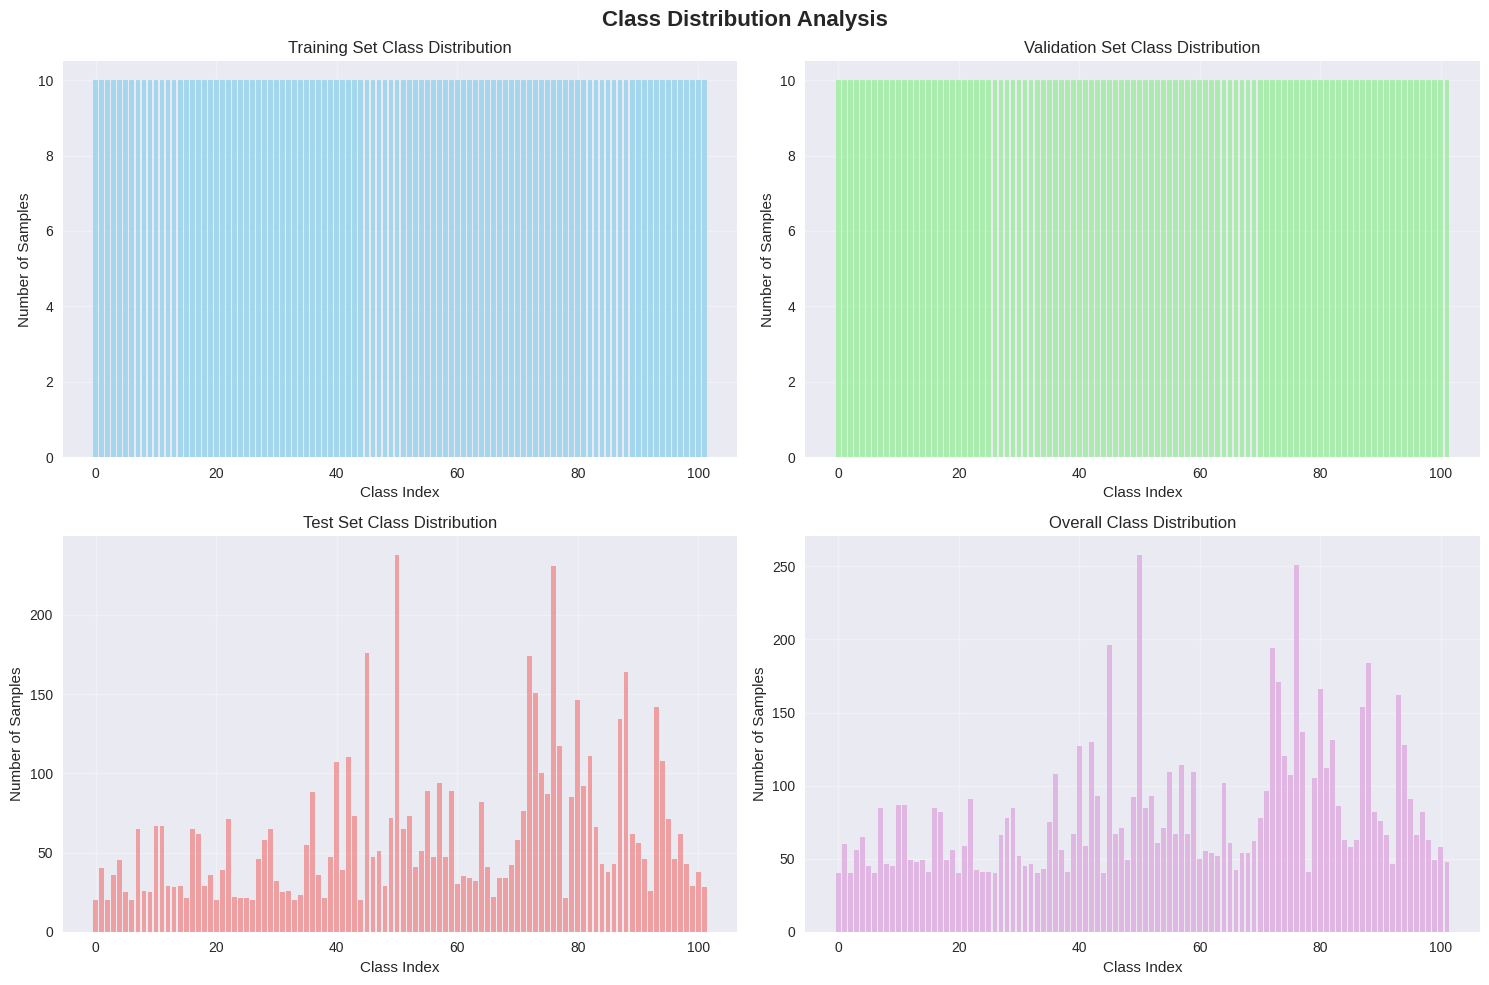

In [7]:
# Visualize class distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Class Distribution Analysis', fontsize=16, fontweight='bold')

# Training distribution
train_values = [train_counts[i] for i in range(num_classes)]
axes[0, 0].bar(range(num_classes), train_values, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Training Set Class Distribution')
axes[0, 0].set_xlabel('Class Index')
axes[0, 0].set_ylabel('Number of Samples')
axes[0, 0].grid(True, alpha=0.3)

# Validation distribution
val_values = [val_counts[i] for i in range(num_classes)]
axes[0, 1].bar(range(num_classes), val_values, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Validation Set Class Distribution')
axes[0, 1].set_xlabel('Class Index')
axes[0, 1].set_ylabel('Number of Samples')
axes[0, 1].grid(True, alpha=0.3)

# Test distribution
test_values = [test_counts[i] for i in range(num_classes)]
axes[1, 0].bar(range(num_classes), test_values, alpha=0.7, color='lightcoral')
axes[1, 0].set_title('Test Set Class Distribution')
axes[1, 0].set_xlabel('Class Index')
axes[1, 0].set_ylabel('Number of Samples')
axes[1, 0].grid(True, alpha=0.3)

# Overall distribution
total_values = [total_counts[i] for i in range(num_classes)]
axes[1, 1].bar(range(num_classes), total_values, alpha=0.7, color='plum')
axes[1, 1].set_title('Overall Class Distribution')
axes[1, 1].set_xlabel('Class Index')
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

 As we can see the data set is imbalanced, because of the 10/10/80 of train/validation/test split set. This is because the dataset split originally use for few-shot learning related research project. Not only that, the dataset is also imbalanced in the class distribution. So we will use class weights to handle this issue.

## 3. Sample Images Visualization

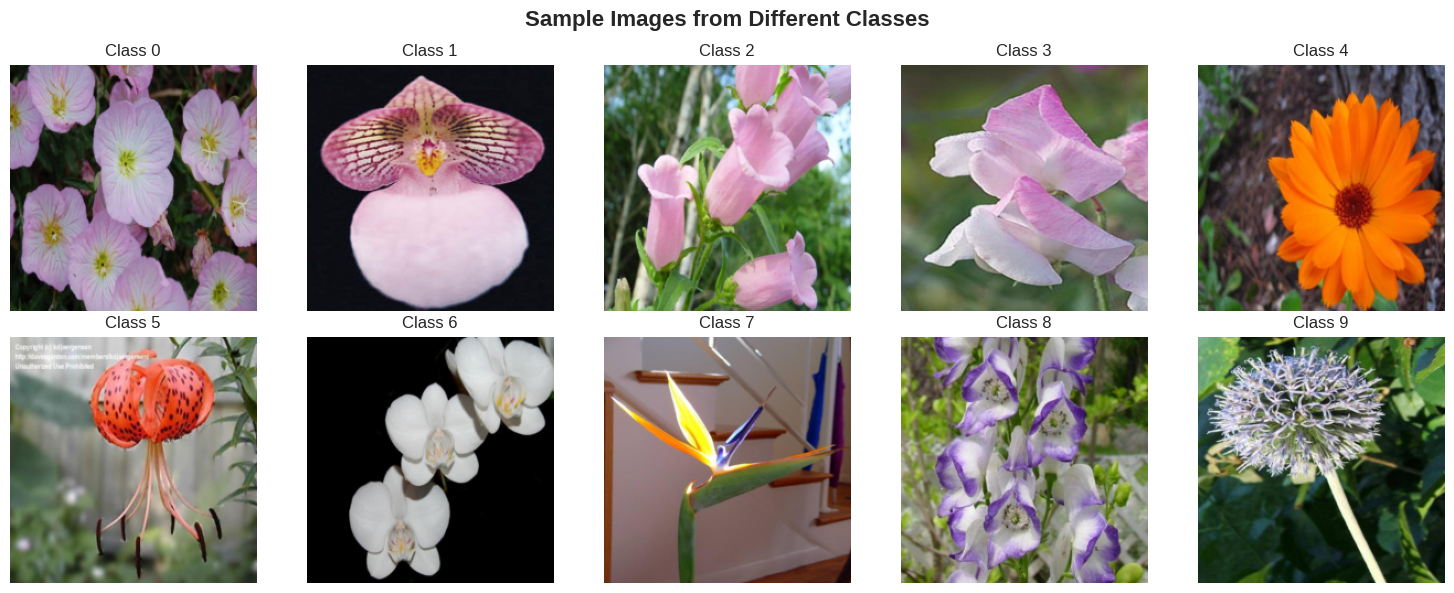

In [8]:
def tensor_to_image(tensor):
    img = tensor.numpy().transpose(1, 2, 0)
    img = np.clip(img, 0, 1)
    return img

# Visualize sample images from each class
def visualize_sample_images(dataset, num_samples=5):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Sample Images from Different Classes', fontsize=16, fontweight='bold')

    # Get random samples from different classes
    classes_shown = set()
    sample_idx = 0

    while len(classes_shown) < num_samples and sample_idx < len(dataset):
        img, label = dataset[sample_idx]
        if label not in classes_shown:
            row = len(classes_shown) // 5
            col = len(classes_shown) % 5

            axes[row, col].imshow(tensor_to_image(img))
            axes[row, col].set_title(f'Class {label}')
            axes[row, col].axis('off')
            classes_shown.add(label)
        sample_idx += 1

    plt.tight_layout()
    plt.show()

visualize_sample_images(train_dataset, num_samples=10)

### Identify the Class IDs with Max and Min samples


Most Frequent Class: 50 (Count: 258)
Least Frequent Class: 0 (Count: 40)


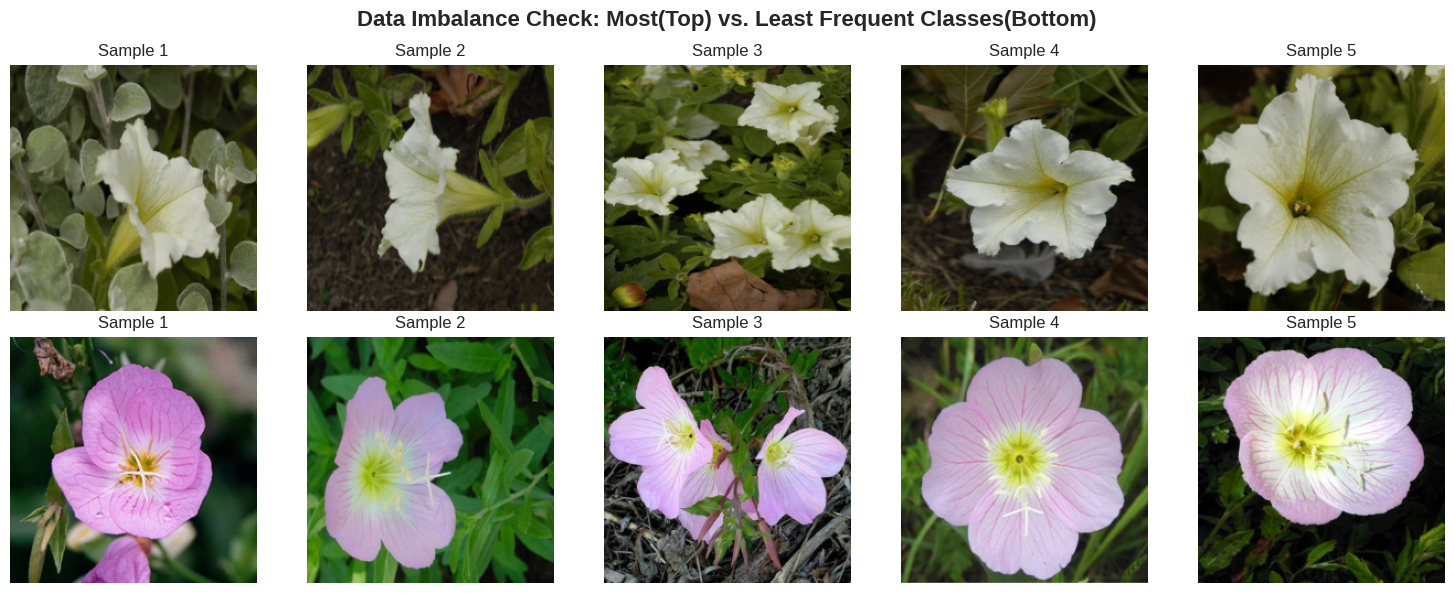

In [9]:
max_class_id = max(total_counts, key=total_counts.get)
max_count = total_counts[max_class_id]

min_class_id = min(total_counts, key=total_counts.get)
min_count = total_counts[min_class_id]

print(f"Most Frequent Class: {max_class_id} (Count: {max_count})")
print(f"Least Frequent Class: {min_class_id} (Count: {min_count})")

# Visualization Function
def visualize_extreme_classes(dataset, class_id_1, name_1, class_id_2, name_2, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))
    fig.suptitle(f'Data Imbalance Check: Most(Top) vs. Least Frequent Classes(Bottom)', fontsize=16, fontweight='bold')
    
    targets = [
        (class_id_1, name_1, 0),
        (class_id_2, name_2, 1)
    ]

    for target_id, title_text, row in targets:
        samples_found = 0
    
        for i in range(len(dataset)):
            if samples_found >= num_samples:
                break
                
            img, label = dataset[i]
            
            current_label = int(label) if hasattr(label, 'item') else label
            
            if current_label == target_id:
                ax = axes[row, samples_found]
                
                ax.imshow(tensor_to_image(img)) 
                
                if samples_found == 0:
                    ax.set_ylabel(title_text, fontsize=12, fontweight='bold')
                
                ax.set_title(f"Sample {samples_found+1}")
                ax.axis('off')
                samples_found += 1
        
        while samples_found < num_samples:
            axes[row, samples_found].axis('off')
            samples_found += 1

    plt.tight_layout()
    plt.show()

visualize_extreme_classes(
    test_dataset, 
    max_class_id, f"Most Common\n(Class {max_class_id}: {max_count} imgs)", 
    min_class_id, f"Least Common\n(Class {min_class_id}: {min_count} imgs)",
    num_samples=5
)

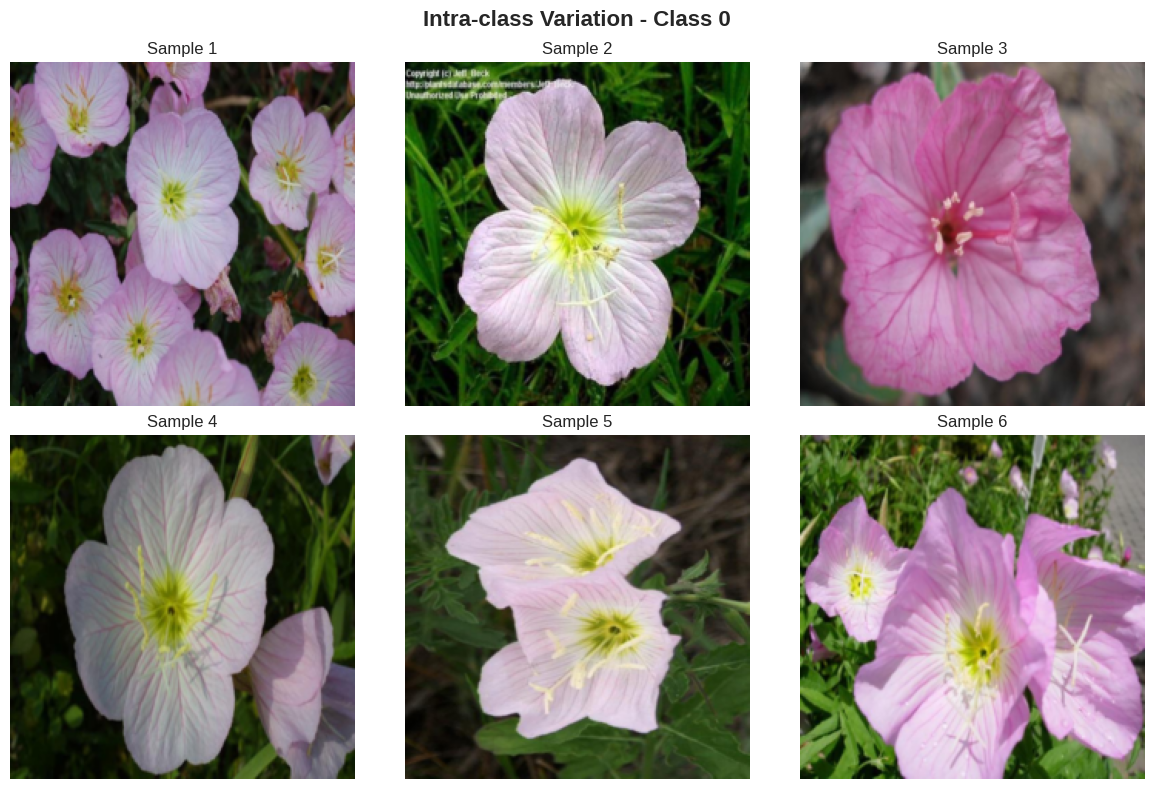

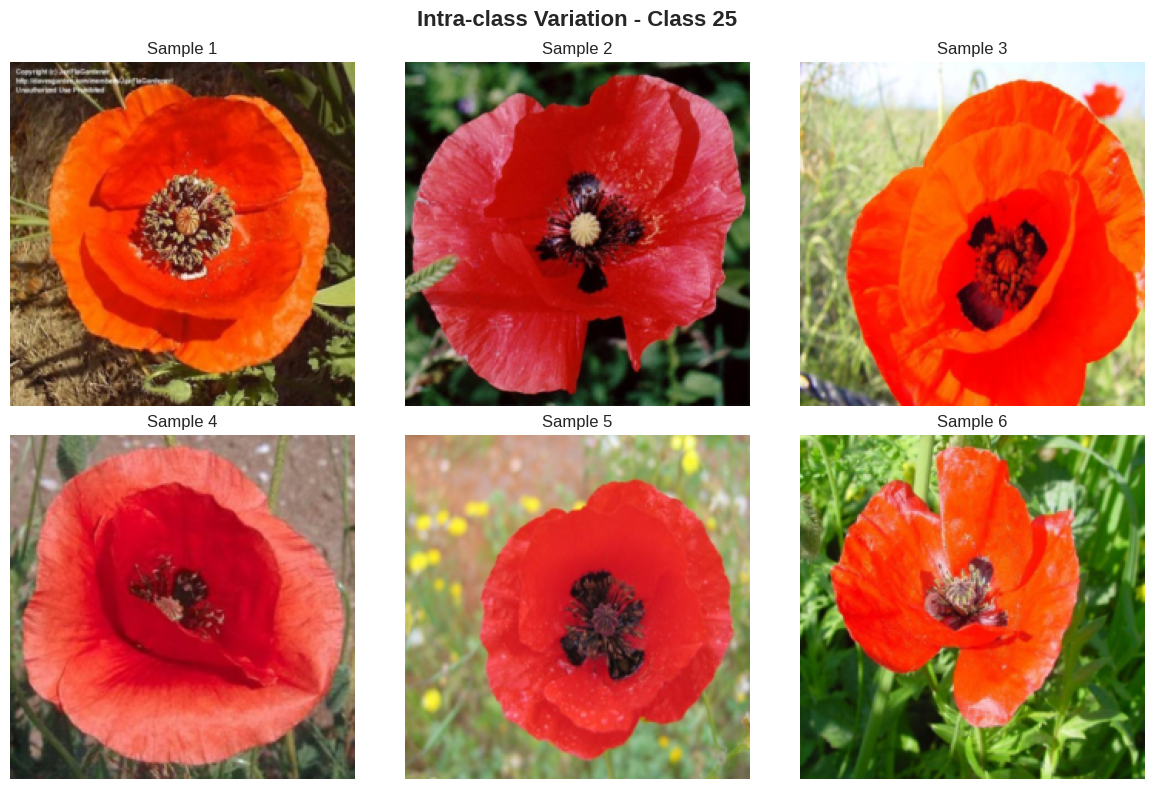

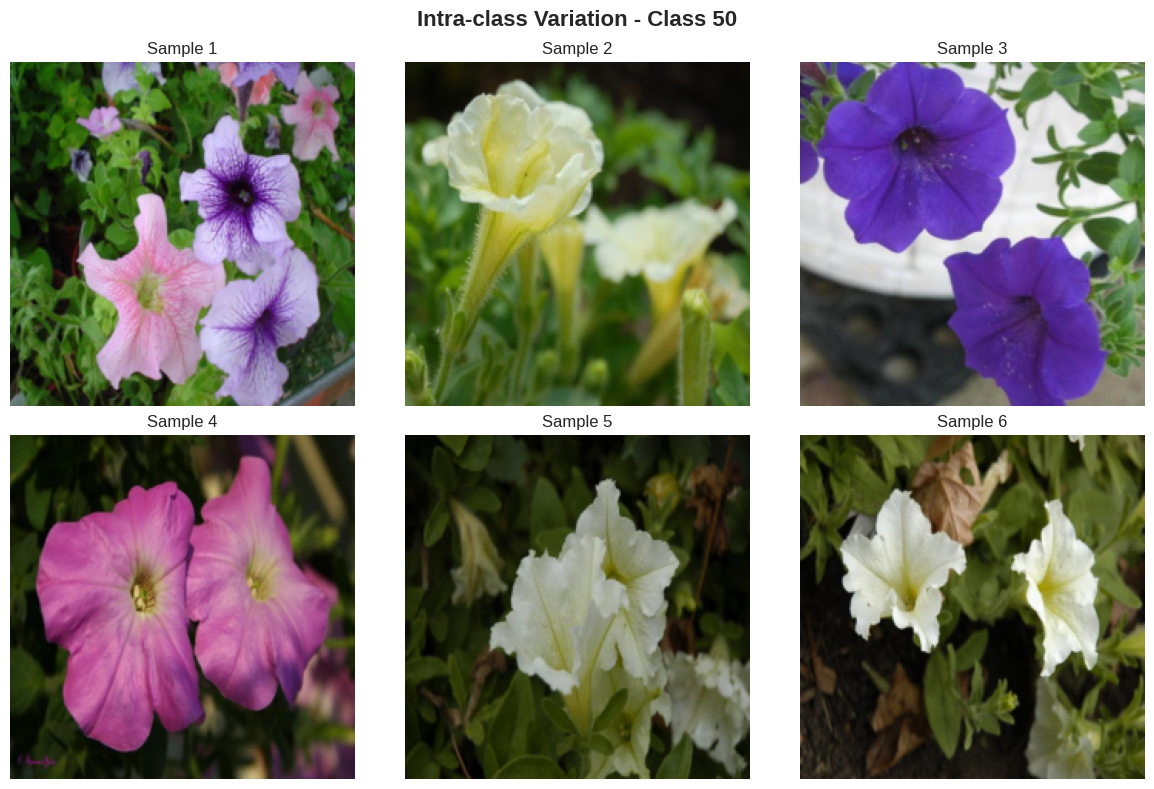

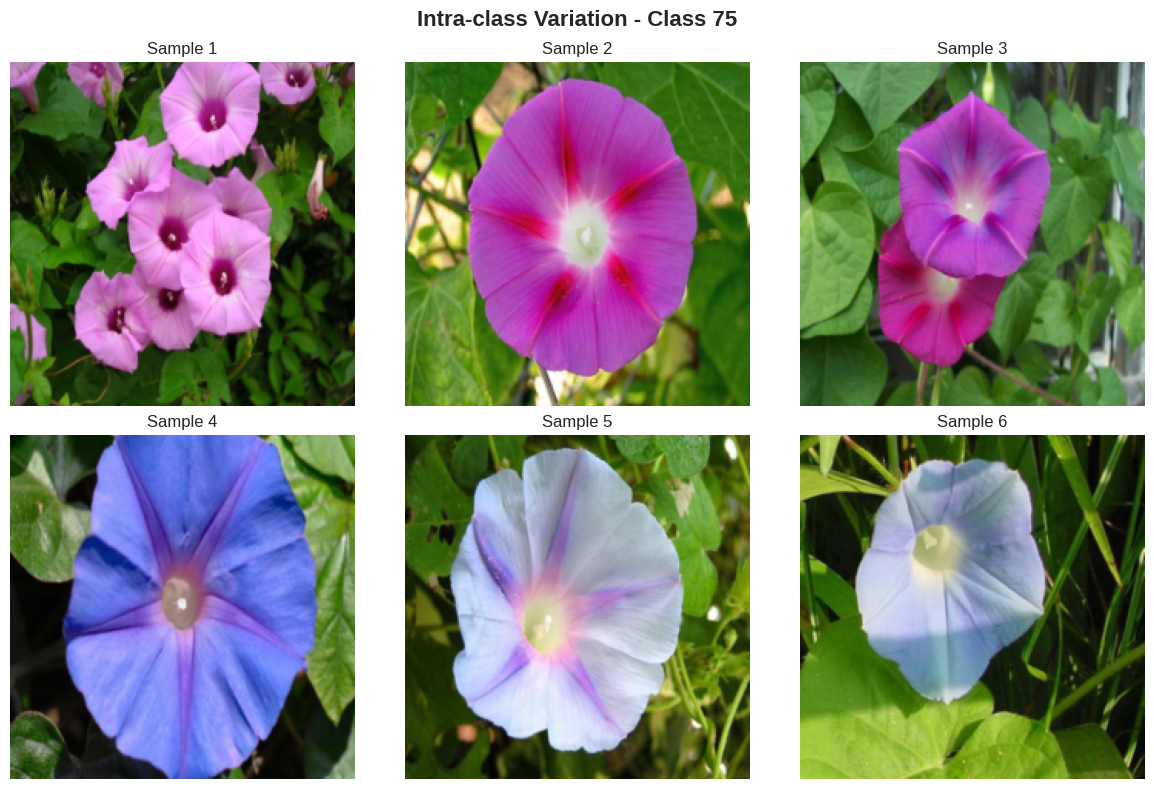

In [10]:
# Show multiple samples from the same class to understand intra-class variation
def visualize_class_variations(dataset, target_class=0, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle(f'Intra-class Variation - Class {target_class}', fontsize=16, fontweight='bold')

    samples_found = 0
    for i in range(len(dataset)):
        if samples_found >= num_samples:
            break
        img, label = dataset[i]
        if label == target_class:
            row = samples_found // 3
            col = samples_found % 3

            axes[row, col].imshow(tensor_to_image(img))
            axes[row, col].set_title(f'Sample {samples_found + 1}')
            axes[row, col].axis('off')
            samples_found += 1

    plt.tight_layout()
    plt.show()

# Show variations for a few different classes
for class_id in [0, 25, 50, 75]:
    if class_id < num_classes:
        visualize_class_variations(train_dataset, target_class=class_id, num_samples=6)

## 4. Image Properties Analysis

In [11]:
# Load original images without resizing to analyze their properties
original_transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = Flowers102(
    root='../src/data',
    split='train',
    download= True
)

# Analyze image dimensions
def analyze_image_properties(dataset, sample_size=100):
    heights = []
    widths = []
    aspects = []
    brightness_values = []
    contrast_values = []

    print(f"Analyzing {sample_size} random images...")

    for i in range(min(sample_size, len(dataset))):
        try:
            # Load image without preprocessing
            img_path = dataset._image_files[i]
            img = Image.open(img_path).convert('RGB')

            # Get dimensions
            width, height = img.size
            heights.append(height)
            widths.append(width)
            aspects.append(width / height)

            # Calculate brightness and contrast
            stat = ImageStat.Stat(img)
            brightness_values.append(stat.mean[0] / 255.0)  # Normalized brightness

            # Calculate contrast (standard deviation of pixel values)
            img_array = np.array(img)
            contrast = np.std(img_array) / 255.0
            contrast_values.append(contrast)

        except Exception as e:
            print(f"Error processing image {i}: {e}")
            continue

    return {
        'heights': heights,
        'widths': widths,
        'aspects': aspects,
        'brightness': brightness_values,
        'contrast': contrast_values
    }

# Analyze properties
properties = analyze_image_properties(train_dataset, sample_size=200)

print("\nImage Properties Summary:")
print(f"Height - Mean: {np.mean(properties['heights']):.1f}, Std: {np.std(properties['heights']):.1f}, Range: [{min(properties['heights'])}, {max(properties['heights'])}]")
print(f"Width - Mean: {np.mean(properties['widths']):.1f}, Std: {np.std(properties['widths']):.1f}, Range: [{min(properties['widths'])}, {max(properties['widths'])}]")
print(f"Aspect Ratio - Mean: {np.mean(properties['aspects']):.2f}, Std: {np.std(properties['aspects']):.2f}")
print(f"Brightness - Mean: {np.mean(properties['brightness']):.3f}, Std: {np.std(properties['brightness']):.3f}")
print(f"Contrast - Mean: {np.mean(properties['contrast']):.3f}, Std: {np.std(properties['contrast']):.3f}")

Analyzing 200 random images...

Image Properties Summary:
Height - Mean: 552.6, Std: 90.6, Range: [500, 913]
Width - Mean: 607.3, Std: 99.9, Range: [500, 845]
Aspect Ratio - Mean: 1.14, Std: 0.30
Brightness - Mean: 0.428, Std: 0.119
Contrast - Mean: 0.257, Std: 0.050


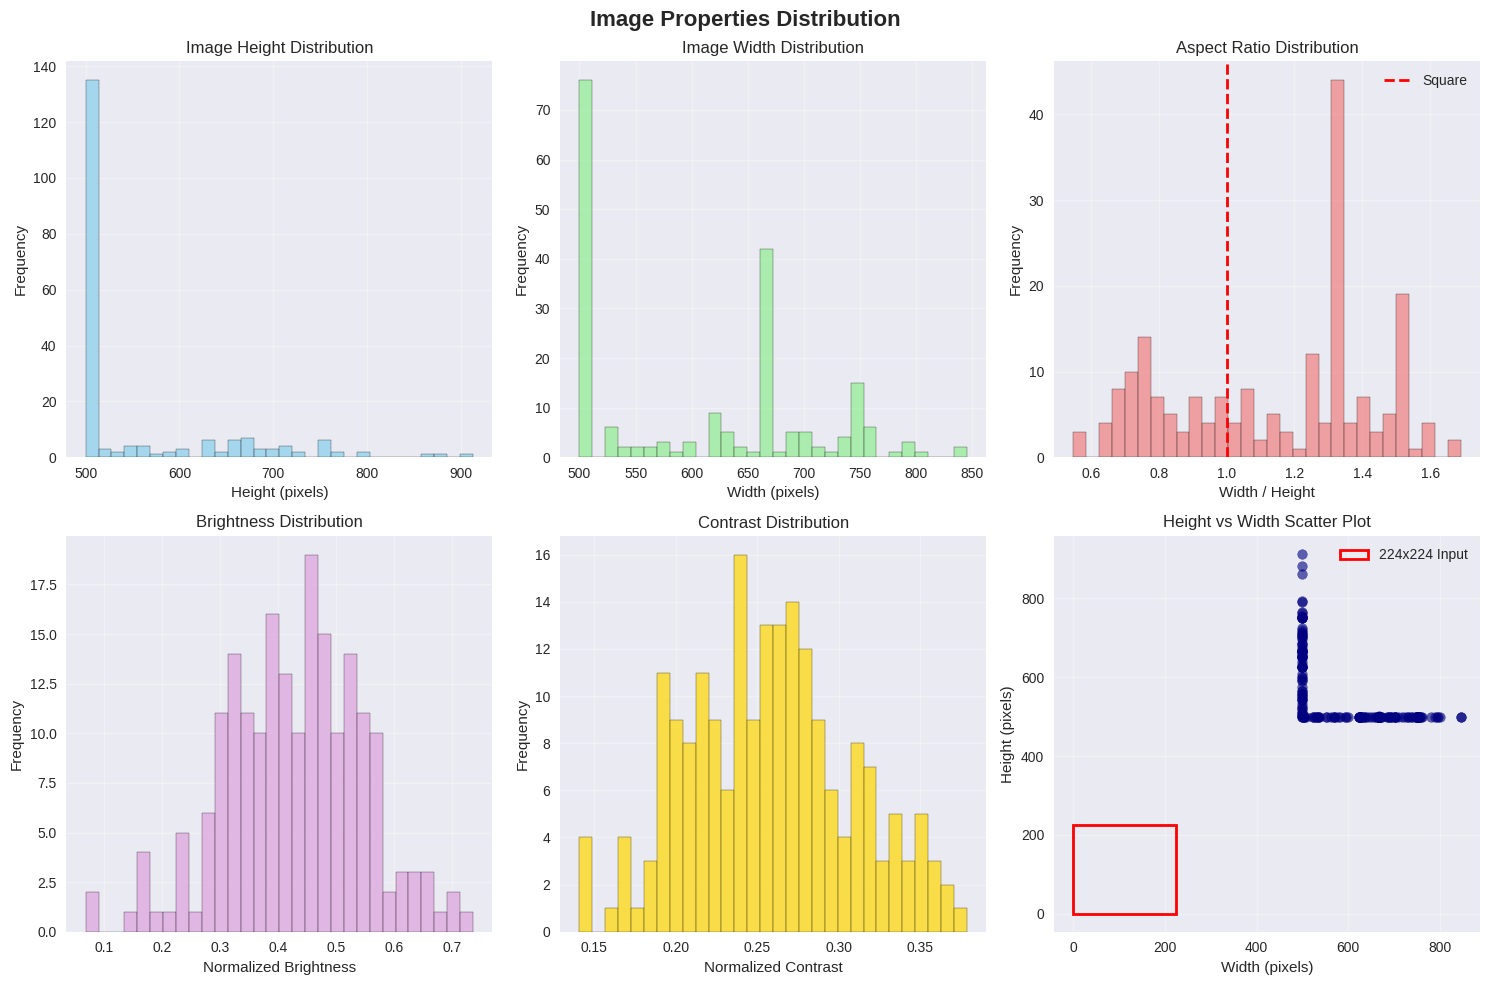

In [12]:
# Visualize image properties
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Image Properties Distribution', fontsize=16, fontweight='bold')

# Height distribution
axes[0, 0].hist(properties['heights'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Image Height Distribution')
axes[0, 0].set_xlabel('Height (pixels)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Width distribution
axes[0, 1].hist(properties['widths'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Image Width Distribution')
axes[0, 1].set_xlabel('Width (pixels)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Aspect ratio distribution
axes[0, 2].hist(properties['aspects'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Aspect Ratio Distribution')
axes[0, 2].set_xlabel('Width / Height')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Square') # <--- Add this
axes[0, 2].legend()

# Brightness distribution
axes[1, 0].hist(properties['brightness'], bins=30, alpha=0.7, color='plum', edgecolor='black')
axes[1, 0].set_title('Brightness Distribution')
axes[1, 0].set_xlabel('Normalized Brightness')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Contrast distribution
axes[1, 1].hist(properties['contrast'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Contrast Distribution')
axes[1, 1].set_xlabel('Normalized Contrast')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

# Scatter plot of height vs width
axes[1, 2].scatter(properties['widths'], properties['heights'], alpha=0.6, color='navy')
axes[1, 2].set_title('Height vs Width Scatter Plot')
axes[1, 2].set_xlabel('Width (pixels)')
axes[1, 2].set_ylabel('Height (pixels)')
axes[1, 2].grid(True, alpha=0.3)
# Add a red box showing your target input size (e.g., 224x224)
rect = patches.Rectangle((0, 0), 224, 224, linewidth=2, edgecolor='red', facecolor='none', label='224x224 Input')
axes[1, 2].add_patch(rect)
axes[1, 2].legend()

plt.tight_layout()
plt.show()

 Based on the plot, we can see that the dataset image have vary image properties in term of size, color, and brightness.

## 5. Data Loading (Custom Stratified Split)
Instead of using the raw torchvision dataset (which has a very small training set of 10 images/class), we use our custom `Flowers102Dataset` class which implements a 70/15/15 Stratified Split. 

Below code is just the implementation of stratified sampling

In [13]:
from torch.utils.data import ConcatDataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
from data.loader import Flowers102
import numpy as np

# Load ALL data parts
train_set = Flowers102(root='../src/data', split='train', transform=data_transform, download=True)
val_set   = Flowers102(root='../src/data', split='val',   transform=data_transform, download=True)
test_set  = Flowers102(root='../src/data', split='test',  transform=data_transform, download=True)

full_dataset = ConcatDataset([train_set, val_set, test_set])

all_labels = []
for ds in [train_set, val_set, test_set]:
    all_labels.extend(ds._labels)

# First split: 70% Train, 30% Temp
train_idx, temp_idx = train_test_split(
    np.arange(len(all_labels)), 
    test_size=0.3, 
    stratify=all_labels, 
    random_state=42
)

# Second split: Split the 30% Temp into 15% Val and 15% Test
val_idx, test_idx = train_test_split(
    temp_idx, 
    test_size=0.5, 
    stratify=[all_labels[i] for i in temp_idx], 
    random_state=42
)

# 4. Create the final Subsets
my_train_dataset = Subset(full_dataset, train_idx)
my_val_dataset   = Subset(full_dataset, val_idx)
my_test_dataset  = Subset(full_dataset, test_idx)

print(f"New Training: {len(my_train_dataset)}")  
print(f"New Validation: {len(my_val_dataset)}")  
print(f"New Test: {len(my_test_dataset)}")  

New Training: 5732
New Validation: 1228
New Test: 1229


In [14]:
# Define simple transform for analysis (Resize only) 
analysis_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

print("Loading Custom Flowers102 Dataset (70/15/15 Split)...")

# Load datasets using custom class
# We can use get_transform to have more additional transforms
train_dataset = Flowers102Dataset(root='../src/data', split='train', transform=analysis_transform, download=True)
val_dataset = Flowers102Dataset(root='../src/data', split='val', transform=analysis_transform, download=True)
test_dataset = Flowers102Dataset(root='../src/data', split='test', transform=analysis_transform, download=True)

print(f"Dataset loaded successfully!")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Total samples: {len(train_dataset) + len(val_dataset) + len(test_dataset)}")

Loading Custom Flowers102 Dataset (70/15/15 Split)...
Dataset loaded successfully!
Training samples: 5732
Validation samples: 1228
Test samples: 1229
Total samples: 8189


## 6. Class Distribution Analysis
We iterate through our custom splits to verify the stratified sampling.

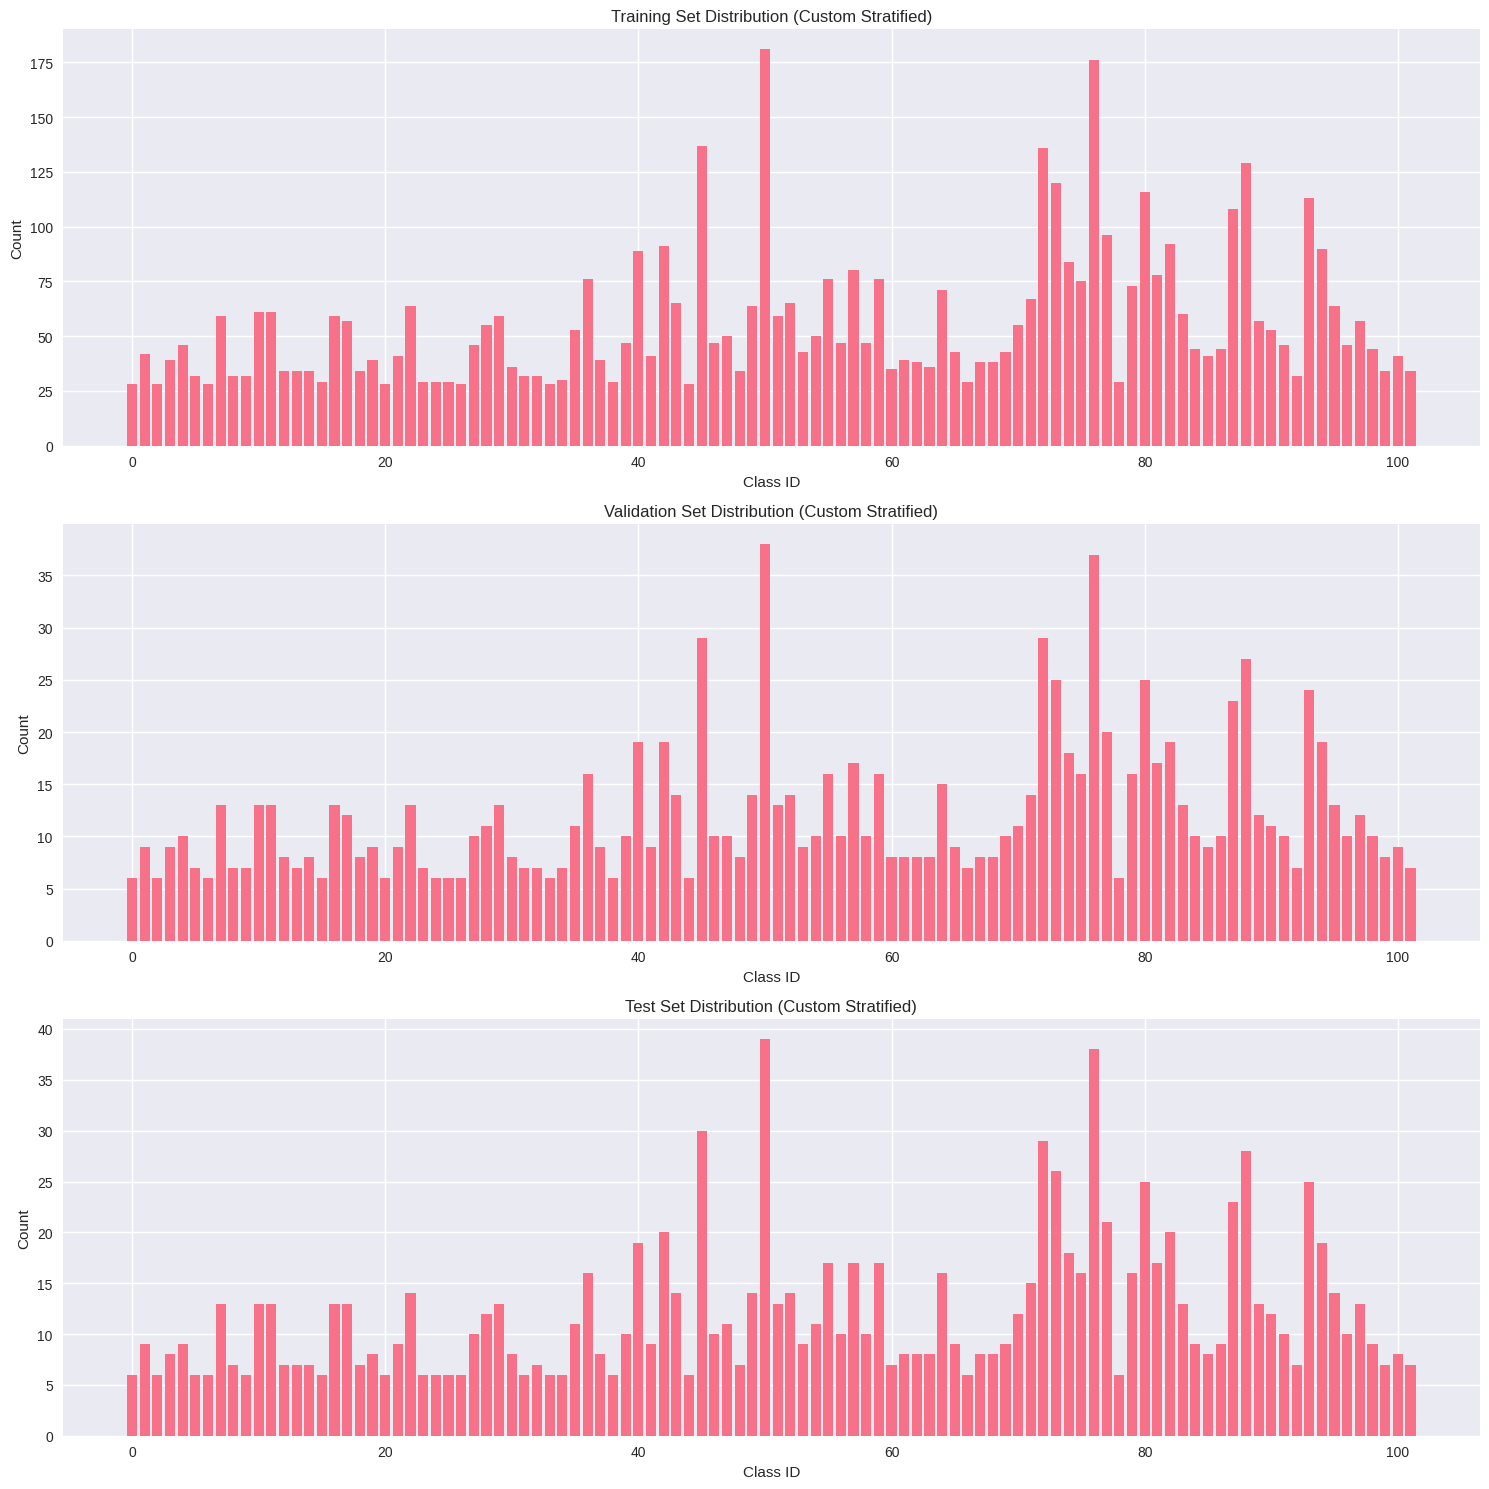

Training Set Stats:
Min samples per class: 28
Max samples per class: 181
Mean samples per class: 56.20
Validation Set Stats:
Min samples per class: 6
Max samples per class: 38
Mean samples per class: 12.04
Test Set Stats:
Min samples per class: 6
Max samples per class: 39
Mean samples per class: 12.05


In [15]:
def get_labels(dataset):
    labels = []
    for idx in dataset.indices:
        labels.append(dataset.labels[idx])
    return labels

train_labels = get_labels(train_dataset)
val_labels = get_labels(val_dataset)
test_labels = get_labels(test_dataset)

def plot_distribution(labels, title, ax):
    counts = Counter(labels)
    # Ensure all classes are represented (0-101)
    counts_list = [counts.get(i, 0) for i in range(102)]
    
    ax.bar(range(102), counts_list)
    ax.set_title(title)
    ax.set_xlabel('Class ID')
    ax.set_ylabel('Count')
    return counts_list

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

train_counts = plot_distribution(train_labels, 'Training Set Distribution (Custom Stratified)', axes[0])
val_counts = plot_distribution(val_labels, 'Validation Set Distribution (Custom Stratified)', axes[1])
test_counts = plot_distribution(test_labels, 'Test Set Distribution (Custom Stratified)', axes[2])

plt.tight_layout()
plt.show()

# Statistics
print("Training Set Stats:")
print(f"Min samples per class: {min(train_counts)}")
print(f"Max samples per class: {max(train_counts)}")
print(f"Mean samples per class: {np.mean(train_counts):.2f}")

print("Validation Set Stats:")
print(f"Min samples per class: {min(val_counts)}")
print(f"Max samples per class: {max(val_counts)}")
print(f"Mean samples per class: {np.mean(val_counts):.2f}")

print("Test Set Stats:")
print(f"Min samples per class: {min(test_counts)}")
print(f"Max samples per class: {max(test_counts)}")
print(f"Mean samples per class: {np.mean(test_counts):.2f}")
